<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Подготовим-данные" data-toc-modified-id="Подготовим-данные-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Подготовим данные</a></span></li><li><span><a href="#Сгенерируем-матрицу-без-использования-функции,-проверяющей-обратимость-матрицы" data-toc-modified-id="Сгенерируем-матрицу-без-использования-функции,-проверяющей-обратимость-матрицы-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Сгенерируем матрицу без использования функции, проверяющей обратимость матрицы</a></span></li><li><span><a href="#Сгенерируем-матрицу-с-использованием-функции,-проверяющей-обратимость-матрицы" data-toc-modified-id="Сгенерируем-матрицу-с-использованием-функции,-проверяющей-обратимость-матрицы-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Сгенерируем матрицу с использованием функции, проверяющей обратимость матрицы</a></span></li><li><span><a href="#Создадим-класс-модели-линейной-регрессии-LinearRegression" data-toc-modified-id="Создадим-класс-модели-линейной-регрессии-LinearRegression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Создадим класс модели линейной регрессии <em>LinearRegression</em></a></span></li><li><span><a href="#Напишем-функцию-для-предсказания-метрики-R2" data-toc-modified-id="Напишем-функцию-для-предсказания-метрики-R2-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Напишем функцию для предсказания метрики <em>R2</em></a></span></li><li><span><a href="#Используем-пайплайн-для-получения-метрики-R2" data-toc-modified-id="Используем-пайплайн-для-получения-метрики-R2-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Используем пайплайн для получения метрики <em>R2</em></a></span><ul class="toc-item"><li><span><a href="#С-использованием-созданного-класса-модели-линейной-регрессии-LinearRegression" data-toc-modified-id="С-использованием-созданного-класса-модели-линейной-регрессии-LinearRegression-4.6.1"><span class="toc-item-num">4.6.1&nbsp;&nbsp;</span>С использованием созданного класса модели линейной регрессии <em>LinearRegression</em></a></span></li><li><span><a href="#С-использованием-модели-LinearRegression-из-модуля-sklearn.linear_model" data-toc-modified-id="С-использованием-модели-LinearRegression-из-модуля-sklearn.linear_model-4.6.2"><span class="toc-item-num">4.6.2&nbsp;&nbsp;</span>С использованием модели <em>LinearRegression</em> из модуля <em>sklearn.linear_model</em></a></span></li></ul></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Защита персональных данных клиентов

Нам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуем корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

# Цели и задачи проекта

**Цели:**

Разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Результаты исследования позволят защитить данные клиентов страховой компании «Хоть потоп».

**Задачи:**

1. Загрузим и изучим данные.


2. Ответим на вопрос и обоснуем решение.

   Умножим признаки на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)

   a. Изменится. Приведём примеры матриц.

   b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.


3. Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.


4. Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из *sklearn* не отличается до и после преобразования. Применим метрику *R2*.


В ходе проведения исследования нам необходимо проверить гипотезу:

- Гипотеза: при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

# Описание данных

Набор данных находится в файле `/datasets/insurance.csv`.
- **Признаки**: пол, возраст и зарплата застрахованного, количество членов его семьи.
- **Целевой признак**: количество страховых выплат клиенту за последние 5 лет.

# План работы

1. Загрузка данных
2. Умножение матриц
3. Алгоритм преобразования
4. Проверка алгоритма
5. Общий вывод.

## Загрузка данных

In [1]:
import pandas as pd # для загрузки данных
import numpy as np # для операций с матрицамиъ
import warnings # для отключения предупреждений
warnings.simplefilter(action='ignore', category=UserWarning) # для отключения предупреждений
import seaborn as sns # для построения тепловой карты (хитмэп)
import matplotlib.pyplot as plt # для построения распределений переменных
from sklearn.model_selection import train_test_split # для разбиения данных на обучающую и тестовую выборки
from sklearn.metrics import r2_score # для расчёта метрики R2
from sklearn.pipeline import Pipeline # для построения пайплайн
from sklearn.base import BaseEstimator, TransformerMixin # для использования в пайплайн
from sklearn.preprocessing import FunctionTransformer # для использования в пайплайн
RANDOM_STATE = 12345

**Задача 1.**

**Загрузим и изучим данные.**

In [2]:
# Загрузим данные:
data = pd.read_csv(r'C:/Users/lorad/OneDrive/Documents/Моя папка/Data Science/Мои проекты/GitHubRepositories/'
                 'YandexPracticum/8_project_work_linear_algebra_protection_of_personal_data_of_clients/insurance.csv')
data.shape

(5000, 5)

In [3]:
data.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
# Посмотрим общую информацию о данных:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
# Посмотрим описание данных:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


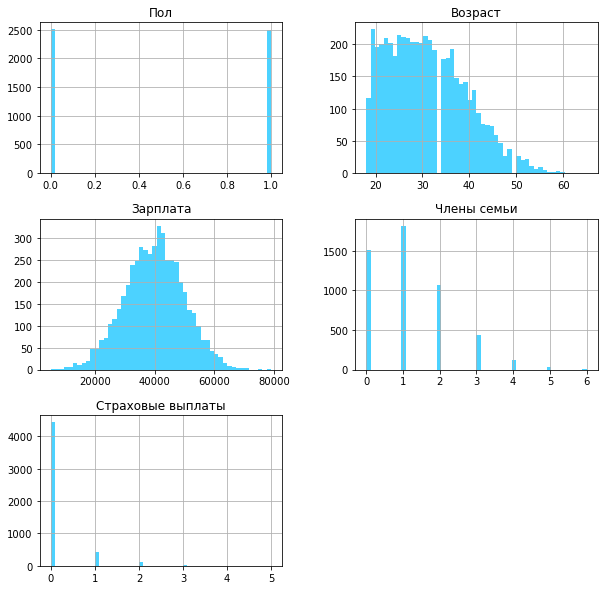

In [6]:
# При помощи гистограмм визуализируем распределение переменных в датасете:
data.hist(figsize=(10, 10), bins=50, alpha=0.7, color='deepskyblue')
plt.show()

In [7]:
# Выведем коэффициенты корреляции Пирсона для переменных датасета:
data.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.002074,0.014910,-0.008991,0.010140
Возраст,0.002074,1.000000,-0.019093,-0.006692,0.651030
Зарплата,0.014910,-0.019093,1.000000,-0.030296,-0.014963
Члены семьи,-0.008991,-0.006692,-0.030296,1.000000,-0.036290
Страховые выплаты,0.010140,0.651030,-0.014963,-0.036290,1.000000


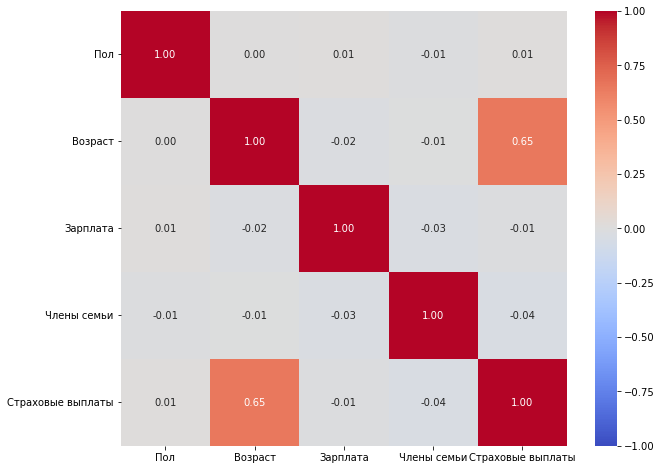

In [8]:
# Построим тепловую карту (хитмэп) коэффициентов корреляции Пирсона для переменных датасета:
plt.figure(figsize=(10,8))
sns.heatmap(
    data.corr(), annot=True, fmt = '.2f', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

In [9]:
# Проверим датасет на наличие явных дубликатов:
data.duplicated().sum()

153

In [10]:
# Удалим явные дубликаты:
data = data.drop_duplicates()
data.shape

(4847, 5)

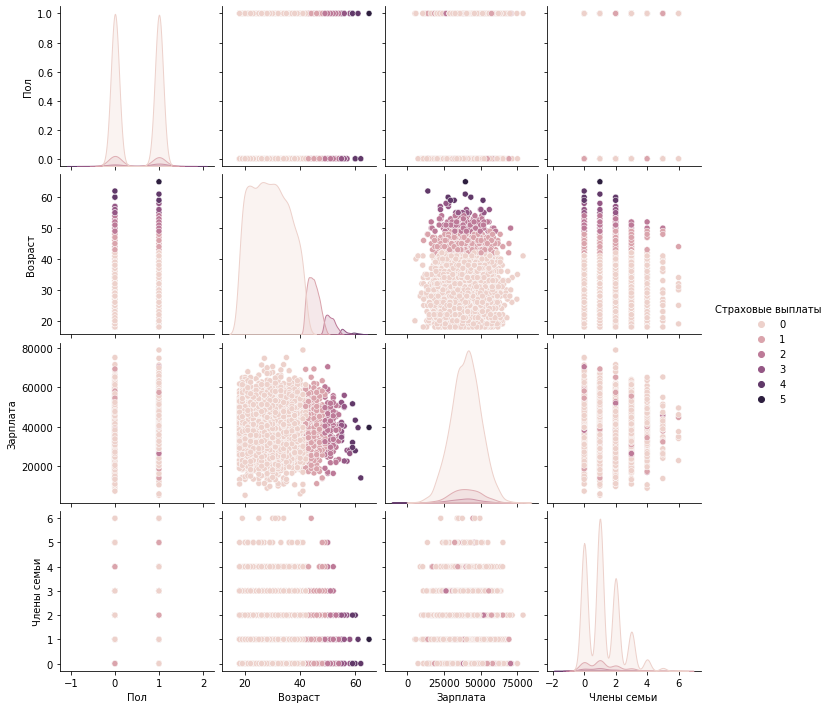

In [11]:
# Проверим датафрейм на мультиколлинеарность:
sns.pairplot(data, hue='Страховые выплаты')
plt.show()

**Вывод**. 

В результате выполнения задач этого раздела было выявлено следующее:
- пропусков в данных нет;
- никаких аномалий в данных не обнаружено;
- существует повышенная корреляция между признаками "возраст" и "страховые выплаты", что логично;
- мультиколлинеарность отсутствует.

Явные дубликаты были удалены.

Таким образом, данные были подготовлены для дальнейшей работы.

## Умножение матриц

В этом задании мы можем записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружим её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можем их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Задача 2.**

**Ответим на вопрос и обоснуем решение.**

   **Умножим признаки на обратимую матрицу. Изменится ли качество линейной регрессии? (Её можно обучить заново.)**

   **a. Изменится. Приведём примеры матриц.**

   **b. Не изменится. Укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.**

**Ответ:** не изменится.

**Обоснование:** для обоснования вывода формулы приведём основные свойства матриц.

**Основные свойства транспонирования матриц:**

1. Двойное транспонирование ***возвращает*** исходную матрицу: $(А^{T})^{T}=А$.

2. Транспонирование ***суммы*** матриц эквивалентно сумме транспонированных слагаемых: $(А+В)^{T}=А^{T}+В^{T}$.

3. Транспонирование ***произведения*** двух матриц эквивалентно произведению транспонированных матриц, взятых ***в обратном порядке***: $(АВ)^{T} = В^{T}А^{T}$.

4. Произведение матрицы на свою транспонированную: $А^{T}А$ или $АА^{T}$ всегда имеет результатом ***симметричную*** квадратную матрицу.

**Основные свойства обратной матрицы:**

1. $АА^{-1}=А^{-1}А=E$, где $E$ - единичная матрица.

2. $(АВ)^{-1}=В^{-1}А^{-1}$, т.е. при раскрытии скобок порядок сомножителей меняется на обратный.

3. $(А^{T})^{-1}=(А^{-1})^{T}$, т.е. операции обращения и транспонирования можно менять местами.

Умножение матриц ассоциативно:

$$
(ABC)^{-1} = C^{-1}(AB)^{-1} = (BC)^{-1}A^{-1} = C^{-1}B^{-1}A^{-1}
$$

НО! Умножение матриц некоммутативно. Это значит, что от перестановки местами матриц в произведении результат меняется.

Умножим матрицу признаков $X$ в формуле обучения $w(X) = (X^T X)^{-1} X^T y$ на обратимую матрицу $P$:

$$
w(XP) = [(XP)^T (XP)]^{-1} (XP)^T y = [P^T X^T XP]^{-1} P^T X^T y = P^{-1}[P^T (X^T X)]^{-1} P^T X^T y = P^{-1}(X^T X)^{-1} [(P^T)^{-1} P^T] X^T y = P^{-1}(X^T X)^{-1} X^T y,
$$

где $[(P^T)^{-1} P^T]=E$.


Отсюда укажем, как связаны параметры линейной регрессии в исходной задаче и в преобразованной:

$$
w(XP) = P^{-1} w(X)
$$

Подставим $w(XP)$ в формулу предсказания $a = Xw(X)$ (т.е. заменим $X$ на $XP$):

$$
a = XP w(XP) = XP [P^{-1} w(X)] = Xw(X)
$$

**Вывод**. 

В результате выполнения задачи этого раздела было выявлено следующее:

мы доказали, что при умножении матрицы признаков $X$ на обратимую матрицу $P$ вектор весов $w$ меняется, а вектор целевого признака $a$ нет. Т.е. качество линейной регрессии не изменится.

## Алгоритм преобразования

**Задача 3.**

**Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.**

**Алгоритм**

1.	Разобьём исходные данные, выделив целевой признак.
2.	Разделим данные на обучающую и тестовую выборки.
3.	Сгенерируем случайную квадратную матрицу *P* с размером, равным количеству признаков в исходном датасете. Нужно генерировать матрицу до тех пор, пока мы не получим обратимую, и наш код гарантированно полностью не отработает. Добиться этого можно с помощью написания специальных для этого функций.
4.	Умножим признаки обучающей и тестовой  выборок  исходного датасета на сгенерированную случайную квадратную матрицу *P*.
5.	Создадим класс модели машинного обучения *LinearRegression*.
6.	Напишем функцию для создания модели линейной регрессии и получим её предсказания метрики *R2*.
7.	Получим *R2* модели для исходной и преобразованной матриц.

**Обоснование**

Обоснование было приведено в разделе 2 "Умножение матриц".

**Вывод**. 

В результате выполнения задачи этого раздела был предложен алгоритм преобразования данных для решения задачи.

## Проверка алгоритма

**Задача 4.**

**Запрограммируем этот алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из *sklearn* не отличается до и после преобразования. Применим метрику *R2*.**

### Подготовим данные

In [12]:
# Разобьём исходные данные, выделив целевой признак:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [13]:
# Разделим данные на обучающую и тестовую выборки в соотношении 80:20:
features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.2, random_state=RANDOM_STATE)

### Сгенерируем матрицу без использования функции, проверяющей обратимость матрицы

Сначала выполним задание без использования функции, проверяющей обратимость матрицы.

Квадратные матрицы, для которых можно найти обратные, называются обратимыми (англ. *invertible matrix*). 

Необратимые матрицы встречаются редко. Если сгенерировать случайную матрицу функцией *numpy.random.normal()* (англ. «нормальное распределение»), вероятность получить необратимую матрицу близка к нулю.

In [14]:
# Сгенерируем случайную квадратную матрицу P с размером, равным количеству признаков в исходном датасете,
# (т.к. количество столбцов исходной матрицы датасета должно совпадать с количеством строк матрицы P):
P = np.random.normal(size=(data.shape[1] - 1, data.shape[1] - 1))
display(P)

array([[ 0.88942973, -1.97468655,  0.3893035 , -0.7724882 ],
       [ 1.04468367, -1.26478818,  1.20343525, -0.52871644],
       [ 0.95826238,  1.25505811, -2.16530068, -0.62669441],
       [-1.8663345 , -0.19352611,  0.88242638,  0.94605803]])

Чтобы найти обратную матрицу, вызовем функцию *numpy.linalg.inv()* (от англ. *linear algebra*, «линейная алгебра»; *invert*, «обратить»). Также она поможет проверить матрицу на обратимость: если матрица необратима, будет обнаружена ошибка.

In [15]:
# Проверим, что эта матрица обратима (умножим её на обратную ей матрицу):
display(np.round(P @ np.linalg.inv(P)))

array([[ 1.,  0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

По условию задания необходимо разработать такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию и, при этом, качество моделей машинного обучения не ухудшилось.

Воспользуемся умножением матрицы признаков исходного датасета на случайную матрицу.

In [16]:
# Умножим признаки обучающей выборки исходного датасета на сгенерированную случайную квадратную матрицу P:
features_train_P = features_train @ P
display(features_train_P.head())

,0,1,2,3
640,28393.817708,37114.305872,-64059.203815,-18564.958534
4510,54742.077566,71630.739839,-123606.496842,-35797.051261
1623,39998.262486,52285.692861,-90246.035909,-26153.074465
3460,32603.971875,42640.717267,-73591.272234,-21319.596777
1820,33678.287774,43995.237004,-75946.134279,-22018.873841


In [17]:
# Умножим признаки тестовой выборки исходного датасета на сгенерированную случайную квадратную матрицу P:
features_test_P = features_test @ P
display(features_test_P.head())

,0,1,2,3
1335,45254.901677,59207.677793,-102174.123581,-29592.909020
3875,63183.810411,82665.881284,-142654.415300,-41316.852895
166,32516.726138,42502.370048,-73361.825388,-21261.268443
3003,18531.474005,24172.907657,-41741.604214,-12113.929898
424,26396.538339,34455.530609,-59488.645708,-17256.525058


Проверим, изменились ли данные после преобразования исходной матрицы:

In [18]:
# Исходный датасет:
display(features_train.head())

,Пол,Возраст,Зарплата,Члены семьи
640,0,28.0,29600.0,0
4510,0,26.0,57100.0,1
1623,1,38.0,41700.0,1
3460,1,23.0,34000.0,1
1820,0,45.0,35100.0,2


In [19]:
# Преобразованная матрица:
display(np.round(features_train_P @ np.linalg.inv(P)).head())

,0,1,2,3
640,-0.0,28.0,29600.0,0.0
4510,-0.0,26.0,57100.0,1.0
1623,1.0,38.0,41700.0,1.0
3460,1.0,23.0,34000.0,1.0
1820,-0.0,45.0,35100.0,2.0


### Сгенерируем матрицу с использованием функции, проверяющей обратимость матрицы

Мы можем избежать лишних шагов и написать функцию, которая будет генерировать матрицу до тех пор, пока мы не получим обратимую, и наш код гарантированно полностью не отработает. 

Напишем три варианта написания кода для такой функции.

In [20]:
# Вариант 1:

def get_rand_matrix():
    det = 0
    while det == 0:
        matrix = np.random.normal(size=(data.shape[1] - 1, data.shape[1] - 1))
        det = np.linalg.det(matrix)
    return matrix


mat = get_rand_matrix()

print(mat)

[[ 0.269322   -0.48912247 -0.79526543 -0.15836302]
 [ 0.0253724  -0.90758273  0.54007106  0.56425173]
 [ 0.12410043  1.05018855  0.01097145  0.71616796]
 [-0.05457566  1.0279607   0.04215483  0.61912469]]


In [21]:
# Вариант 2 (с помощью рекурсии):

def func(dim):
    transform_matrix = np.random.rand(dim, dim)
    try: 
        inv = np.linalg.inv(transform_matrix)
        return transform_matrix, inv
    except:
        func(dim)
   

features_new, inv_P = func(data.shape[1] - 1)

print(inv_P)

[[ 4.53163801 -9.26907014  2.41091849  5.35421532]
 [-2.29339699 10.14268994 -0.14245227 -8.86860675]
 [ 0.57174801 -5.10664838  4.25978001  0.99472564]
 [ 0.23612112  0.15108483 -3.88987639  4.42620767]]


In [22]:
# Вариант 3 (с помощью рекурсии). 
# В этом варианте мы можем вывести и сгенерированную квадратную матрицу, 
# и преобразованные матрицы исходного датасета для обучающей и тестовой выборок:

def func(X, seed):
    try:
        state = np.random.RandomState(seed=seed)
        rand_matrix = state.normal(size=(X.shape[1], X.shape[1])) 
        inv = np.linalg.inv(rand_matrix)
        return X @ rand_matrix, inv
    except np.linalg.LinAlgError:
        func(X, seed)
        
        
features_train_P, inv_P = func(features_train, RANDOM_STATE)
features_test_P, inv_P = func(features_test, RANDOM_STATE)

display('Сгенерированная квадратная матрица P', inv_P)
display('Преобразованная исходная матрица для обучающей выборки', features_train_P.head())
display('Преобразованная исходная матрица для тестовой выборки', features_test_P.head())

'Сгенерированная квадратная матрица P'

array([[-1.31136747,  0.3921804 ,  0.18868055, -0.67088287],
       [ 1.75872714,  0.14106138, -0.17773045,  0.79787127],
       [-0.41702659, -0.22854768,  0.3550602 ,  0.33039819],
       [ 0.58912996,  0.19073027, -0.5545481 ,  0.6259302 ]])

'Преобразованная исходная матрица для обучающей выборки'

,0,1,2,3
640,22818.109857,36933.483560,29815.406405,-38360.255937
4510,43962.573897,71207.880912,57514.280840,-74006.013501
1623,32143.011015,52029.985785,42004.160189,-54041.383197
3460,26192.050536,42411.537228,34247.408517,-44064.706849
1820,27081.702232,43813.020335,35359.233139,-45482.909494


'Преобразованная исходная матрица для тестовой выборки'

,0,1,2,3
1335,36342.873437,58864.246835,47540.955120,-61175.711919
3875,50741.287476,82185.117058,66376.232278,-85412.510944
166,26135.081077,42301.056725,34148.971577,-43931.380847
3003,14919.350981,24110.991065,19445.083842,-25004.306447
424,21239.096499,34341.509745,27704.686930,-35631.347319


### Создадим класс модели линейной регрессии *LinearRegression*

In [23]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = ((np.linalg.inv(X.T @ X)) @ X.T) @ y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return (test_features @ self.w) + self.w0

Здесь мы применили сокращённую запись формулы линейной регрессии: в обучающую выборку добавили единичный столбец (*numpy.ones()*).

Другой способ написания кода:

In [24]:
# class LinearRegression:
#     def fit(self, train_features, train_target):
#         X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
#         y = train_target
#         w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y) # < напишите код здесь >
#         self.w = w[1:]
#         self.w0 = w[0]

#     def predict(self, test_features):
#         return test_features.dot(self.w) + self.w0

### Напишем функцию для предсказания метрики *R2*

In [25]:
# Напишем функцию для предсказания метрики R2, применив созданный выше класс модели линейной регрессии:
def model(x_train, y_train, x_test, y_test):
    model = LinearRegression()
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)
    print('R2 модели:', r2_score(y_test, predictions))
    print(f'R2 модели (округлённо): {r2_score(y_test, predictions):.2f}')

In [26]:
# R2 модели для исходной матрицы:
model(features_train, target_train, features_test, target_test)

R2 модели: 0.4160549216151218
R2 модели (округлённо): 0.42


In [27]:
# R2 модели для преобразованной матрицы:
model(features_train_P, target_train, features_test_P, target_test)

R2 модели: 0.4160550721783268
R2 модели (округлённо): 0.42


### Используем пайплайн для получения метрики *R2*

Для получения метрики *R2* полезно использовать пайплайн.

В узком смысле, пайплайн – это модуль `sklearn.pipeline`, который позволяет автоматизировать предварительные преобразования данных перед обучением модели. 

#### С использованием созданного класса модели линейной регрессии *LinearRegression*

Построим пайплайн с использованием созданного ранее класса модели линейной регрессии `LinearRegression`.

In [28]:
# 1. Создаем класс MatrixTransformer:   
    
class MatrixTransformer(BaseEstimator, TransformerMixin):

    def __init__(self, variables):
        """В конструкторе сохраним имена колонок и сгененрируем матрицу преобразования"""
        self.variables = variables
        size = len(variables)
        rng = np.random.default_rng(seed=RANDOM_STATE)
        self.M = rng.normal(size=(size, size))

    def fit(self, X, y):
        return self

    def transform(self, X):
        X_tr = X.drop(self.variables, axis=1)
        X_tr[self.variables] = X[self.variables] @ self.M
        return X_tr

In [29]:
# 2. Иcпользуем Pipeline:

pipe = Pipeline([
    ('transformer', MatrixTransformer(features.columns)),
    ('model', LinearRegression()),
])

In [30]:
# Обучим модель линейной регрессии на исходных признаках датасета и получим её предсказания метрики R2:
pipe.fit(features_train, target_train)
predictions = pipe.predict(features_test)
r2_score(target_test, predictions)

0.41605498652632955

In [31]:
# Преобразуем датасет: умножим признаки обучающей и тестовой выборок исходного датасета 
# на сгенерированную случайную квадратную матрицу P:
features_train_P = features_train @ P
features_test_P = features_test @ P
display(features_train_P.head())
display(features_test_P.head())

,0,1,2,3
640,28393.817708,37114.305872,-64059.203815,-18564.958534
4510,54742.077566,71630.739839,-123606.496842,-35797.051261
1623,39998.262486,52285.692861,-90246.035909,-26153.074465
3460,32603.971875,42640.717267,-73591.272234,-21319.596777
1820,33678.287774,43995.237004,-75946.134279,-22018.873841


,0,1,2,3
1335,45254.901677,59207.677793,-102174.123581,-29592.909020
3875,63183.810411,82665.881284,-142654.415300,-41316.852895
166,32516.726138,42502.370048,-73361.825388,-21261.268443
3003,18531.474005,24172.907657,-41741.604214,-12113.929898
424,26396.538339,34455.530609,-59488.645708,-17256.525058


In [32]:
# После преобразования матриц названия признаков были изменены на индексы от 0 до 3.
# Восстановим эти названия для того, чтобы сработал наш пайплайн:

features_train_P.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']
features_test_P.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']

display(features_train_P.head())
display(features_test_P.head())

,Пол,Возраст,Зарплата,Члены семьи
640,28393.817708,37114.305872,-64059.203815,-18564.958534
4510,54742.077566,71630.739839,-123606.496842,-35797.051261
1623,39998.262486,52285.692861,-90246.035909,-26153.074465
3460,32603.971875,42640.717267,-73591.272234,-21319.596777
1820,33678.287774,43995.237004,-75946.134279,-22018.873841


,Пол,Возраст,Зарплата,Члены семьи
1335,45254.901677,59207.677793,-102174.123581,-29592.909020
3875,63183.810411,82665.881284,-142654.415300,-41316.852895
166,32516.726138,42502.370048,-73361.825388,-21261.268443
3003,18531.474005,24172.907657,-41741.604214,-12113.929898
424,26396.538339,34455.530609,-59488.645708,-17256.525058


In [33]:
# Обучим модель линейной регрессии на преобразованных признаках датасета и получим её предсказания метрики R2:
pipe.fit(features_train_P, target_train)
predictions = pipe.predict(features_test_P)
r2_score(target_test, predictions)

0.416029572484407

#### С использованием модели *LinearRegression* из модуля *sklearn.linear_model*

Добавим импорт модели линейной регрессии `LinearRegression` из модуля `sklearn.linear_model`.

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
cypher = get_rand_matrix()

pipeline = Pipeline(steps=[("cypher", FunctionTransformer(lambda x: x @ cypher, validate=False)), 
                           ("linreg", LinearRegression())])

In [36]:
# Обучим модель линейной регрессии на исходных признаках датасета и получим её предсказания метрики R2:
pipe.fit(features_train, target_train)
predictions = pipe.predict(features_test)
r2_score(target_test, predictions)

0.41605498652632955

In [37]:
# Преобразуем датасет: умножим признаки обучающей и тестовой выборок исходного датасета 
# на сгенерированную случайную квадратную матрицу P:
features_train_P = features_train @ P
features_test_P = features_test @ P
display(features_train_P.head())
display(features_test_P.head())

,0,1,2,3
640,28393.817708,37114.305872,-64059.203815,-18564.958534
4510,54742.077566,71630.739839,-123606.496842,-35797.051261
1623,39998.262486,52285.692861,-90246.035909,-26153.074465
3460,32603.971875,42640.717267,-73591.272234,-21319.596777
1820,33678.287774,43995.237004,-75946.134279,-22018.873841


,0,1,2,3
1335,45254.901677,59207.677793,-102174.123581,-29592.909020
3875,63183.810411,82665.881284,-142654.415300,-41316.852895
166,32516.726138,42502.370048,-73361.825388,-21261.268443
3003,18531.474005,24172.907657,-41741.604214,-12113.929898
424,26396.538339,34455.530609,-59488.645708,-17256.525058


In [38]:
# После преобразования матриц названия признаков были изменены на индексы от 0 до 3.
# Восстановим эти названия для того, чтобы сработал наш Pipeline:

features_train_P.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']
features_test_P.columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']

display(features_train_P.head())
display(features_test_P.head())

,Пол,Возраст,Зарплата,Члены семьи
640,28393.817708,37114.305872,-64059.203815,-18564.958534
4510,54742.077566,71630.739839,-123606.496842,-35797.051261
1623,39998.262486,52285.692861,-90246.035909,-26153.074465
3460,32603.971875,42640.717267,-73591.272234,-21319.596777
1820,33678.287774,43995.237004,-75946.134279,-22018.873841


,Пол,Возраст,Зарплата,Члены семьи
1335,45254.901677,59207.677793,-102174.123581,-29592.909020
3875,63183.810411,82665.881284,-142654.415300,-41316.852895
166,32516.726138,42502.370048,-73361.825388,-21261.268443
3003,18531.474005,24172.907657,-41741.604214,-12113.929898
424,26396.538339,34455.530609,-59488.645708,-17256.525058


In [39]:
# Обучим модель линейной регрессии на преобразованных признаках датасета и получим её предсказания метрики R2:
pipe.fit(features_train_P, target_train)
predictions = pipe.predict(features_test_P)
r2_score(target_test, predictions)

0.416029572484407

**Вывод**. 

В результате выполнения задач этого раздела было выявлено следующее:

применив метрику *R2*, мы проверили, что качество линейной регрессии из *sklearn* не отличается до и после преобразования исходной матрицы.

## Общий вывод

Разработан такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

Входные данные - данные клиентов страховой компании «Хоть потоп».

Результаты исследования позволят защитить данные клиентов страховой компании «Хоть потоп».

Перед проведением исследования была сформулирована гипотеза:

- Гипотеза: при умножении признаков на обратимую матрицу качество линейной регрессии не меняется.

В результате удалось получить следующие результаты.

Гипотеза подтверждена:
- *0.42* - значение метрики *R2* модели для исходной матрицы;
- *0.42* - значение метрики *R2* модели для преобразованной матрицы.

<b>Общие рекомендации:</b>

Специалистам, которые занимаются защитой персональных данных клиентов страховой компании «Хоть потоп», можно применять разработанный метод преобразования данных (умножение матрицы признаков исходного датасета на случайную матрицу), т.к. при преобразовании качество моделей машинного обучения не ухудшается.